<a href="https://colab.research.google.com/github/sahilfaizal01/Twitter-Sentiment-Analyzer-Engine/blob/main/Sentiment_Analyzer_Engine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import numpy as np
import tweepy,re
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [30]:
#Authentication
bearerToken = 'AAAAAAAAAAAAAAAAAAAAAKolfQEAAAAA3zSEtbLtLV1Jyq%2BkFwmBtI8YNVQ%3DzbfGBBwBZOfuf51KD0TnL3LVKjpteSPEDB2SiR4O5i0KKsVDJV'

In [31]:
#Put your Bearer Token in the parenthesis below
client = tweepy.Client(bearer_token=bearerToken)

In [32]:
query = '#SSR -is:retweet lang:en'
tweets = tweepy.Paginator(client.search_recent_tweets, query=query,
                              tweet_fields=['context_annotations', 'created_at'], max_results=100).flatten(limit=1000)

In [33]:
tweet_list = [tweet.text for tweet in tweets]
tweet_df = pd.DataFrame(tweet_list)
tweet_df

,0
0,This disgraceful act can never be reversed. #A...
1,@DireARTOfGod This disgraceful act can never b...
2,The T-shirt in question carries the caption 'D...
3,"@AUC_PAPS, @AfricaDCAF and @issat_dcaf jointly..."
4,'Spreading false hood': Sushant Singh Rajput f...
...,...
387,@mohakmangal Sushant Harbinger Of Change | Fac...
388,Sushant Harbinger Of Change | Fact Check of Wh...
389,Contd: #PartialHanging \n\n#SSR was KNEELING o...
390,"After defeat of Karan Johar's JJJ, Aadhi Chopr..."


In [34]:
tweet_df.shape

(392, 1)

In [35]:
def clean_data(text):
    return ' '.join(re.sub("(@[a-zA-Z0-9]+)|([^0-9A-Za-z])|(https://[\w.]+/[\w]+)", " ", text).split())

tweet_df['cleaned_data'] = tweet_df[0].apply(clean_data)

In [36]:
tweet_df.head()

,0,cleaned_data
0,This disgraceful act can never be reversed. #A...,This disgraceful act can never be reversed Ama...
1,@DireARTOfGod This disgraceful act can never b...,This disgraceful act can never be reversed Ama...
2,The T-shirt in question carries the caption 'D...,The T shirt in question carries the caption De...
3,"@AUC_PAPS, @AfricaDCAF and @issat_dcaf jointly...",PAPS and dcaf jointly organised a course on SS...
4,'Spreading false hood': Sushant Singh Rajput f...,Spreading false hood Sushant Singh Rajput fans...


In [37]:
def drop_numbers(list_text):
    list_text_new = []
    for i in list_text:
        if not re.search('\d', i):
            list_text_new.append(i)
    return ''.join(list_text_new)

tweet_df['cleaned_data'] = tweet_df['cleaned_data'].apply(drop_numbers)

In [38]:
tweet_df.head()

,0,cleaned_data
0,This disgraceful act can never be reversed. #A...,This disgraceful act can never be reversed Ama...
1,@DireARTOfGod This disgraceful act can never b...,This disgraceful act can never be reversed Ama...
2,The T-shirt in question carries the caption 'D...,The T shirt in question carries the caption De...
3,"@AUC_PAPS, @AfricaDCAF and @issat_dcaf jointly...",PAPS and dcaf jointly organised a course on SS...
4,'Spreading false hood': Sushant Singh Rajput f...,Spreading false hood Sushant Singh Rajput fans...


In [40]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [41]:
# changing all the words of the reviews column to lowercase letters
def lower_case(text):
    text_words = word_tokenize(text)
    text_words_lower = [x.lower() for x in text_words]
    return ' '.join(text_words_lower)

tweet_df['cleaned_data'] = tweet_df['cleaned_data'].apply(lower_case)

In [42]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [44]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [45]:
lemmatizer = WordNetLemmatizer()
def lemmatise(text):
    text_tokens = word_tokenize(text)
    text_lemm = [lemmatizer.lemmatize(word) for word in text_tokens]
    return ' '.join(text_lemm)

tweet_df['cleaned_data'] = tweet_df['cleaned_data'].apply(lemmatise)

In [48]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [49]:
def remove_stopword(text):
    text_tokens = word_tokenize(text)
    tokens = [word for word in text_tokens if not word in set(stopwords.words('english'))]
    tokens_text = ' '.join(tokens)
    return tokens_text

tweet_df['cleaned_data'] = tweet_df['cleaned_data'].apply(remove_stopword)

In [46]:
tweet_df['cleaned_data'].values

array(['this disgraceful act can never be reversed amazon ha shown how low an e commerce platform can stoop to get r fame amp defame a national hero whose brutal murder ha shaken up people around the globe ssr movement ha brought down a cartel like bullywood next is',
       'this disgraceful act can never be reversed amazon ha shown how low an e commerce platform can stoop to get r fame amp defame a national hero whose brutal murder ha shaken up people around the globe ssr movement ha brought down a cartel like bullywood next is',
       'the t shirt in question carry the caption depression is like drowning with a picture of the late actor sushant singh rajput flipkart ssr sushantsinghrajput',
       'pap and dcaf jointly organised a course on ssr for au member state topic such a the au ssr policy framework national ownership and strategic planning were discussed albertg',
       'spreading false hood sushant singh rajput fan trend boycottflipkart over t shirt design here s why ssr su

In [50]:
# Lets calculate the Polarity of the Reviews
def get_polarity(text):
    textblob = TextBlob(str(text))
    pol = textblob.sentiment.polarity
    if(pol==0):
        return "Neutral"
    elif(pol>0 and pol<=0.3):
        return "Weakly Positive"
    elif(pol>0.3 and pol<=0.6):
        return "Positive"
    elif(pol>0.6 and pol<=1):
        return "Strongly Positive"
    elif(pol>-0.3 and pol<=0):
        return "Weakly Negative"
    elif(pol>-0.6 and pol<=-0.3):
        return "Negative"
    elif(pol>-1 and pol<=-0.6):
        return "Strongly Negative"
    
tweet_df['polarity'] = tweet_df['cleaned_data'].apply(get_polarity)

In [51]:
tweet_df['polarity'].value_counts()

Neutral              157
Weakly Positive       79
Positive              56
Weakly Negative       52
Negative              25
Strongly Positive     19
Strongly Negative      4
Name: polarity, dtype: int64

In [52]:
tweet_df.dtypes

0               object
cleaned_data    object
polarity        object
dtype: object

In [53]:
neutral = 0
wpositive = 0
spositive = 0
positive = 0
negative = 0
wnegative = 0
snegative = 0
polarity = 0

for i in range(392):
    textblob = TextBlob(str(tweet_df['cleaned_data'][i]))
    polarity+= textblob.sentiment.polarity
    pol = textblob.sentiment.polarity
    if (pol == 0):  # adding reaction of how people are reacting to find average later
        neutral += 1
    elif (pol > 0 and pol <= 0.3):
        wpositive += 1
    elif (pol > 0.3 and pol <= 0.6):
        positive += 1
    elif (pol > 0.6 and pol <= 1):
        spositive += 1
    elif (pol > -0.3 and pol <= 0):
        wnegative += 1
    elif (pol > -0.6 and pol <= -0.3):
        negative += 1
    elif (pol > -1 and pol <= -0.6):
        snegative += 1

In [58]:
NoOfTerms = 392

In [59]:
# finding average reaction
polarity = polarity / NoOfTerms
polarity

0.00020241189489110281

In [60]:
def percentage(part, whole):
    temp = 100 * float(part) / float(whole)
    return format(temp, '.2f')

In [61]:
 # finding average of how people are reacting
positive = percentage(positive, NoOfTerms)
wpositive = percentage(wpositive, NoOfTerms)
spositive = percentage(spositive, NoOfTerms)
negative = percentage(negative, NoOfTerms)
wnegative = percentage(wnegative, NoOfTerms)
snegative = percentage(snegative, NoOfTerms)
neutral = percentage(neutral, NoOfTerms)


In [62]:
# printing out data
print("How people are reacting on " + searchTerm + " by analyzing " + str(NoOfTerms) + " tweets.")
print()
print("-----------------------------------------------------------------------------------------")
print()
print("General Report: ")

if (polarity == 0):
    print("Neutral")
elif (polarity > 0 and polarity <= 0.3):
    print("Weakly Positive")
elif (polarity > 0.3 and polarity <= 0.6):
    print("Positive")
elif (polarity > 0.6 and polarity <= 1):
    print("Strongly Positive")
elif (polarity > -0.3 and polarity <= 0):
    print("Weakly Negative")
elif (polarity > -0.6 and polarity <= -0.3):
    print("Negative")
elif (polarity > -1 and polarity <= -0.6):
    print("Strongly Negative")

print()
print("------------------------------------------------------------------------------------------")
print()
print("Detailed Report: ")
print(str(positive) + "% people thought it was positive")
print(str(wpositive) + "% people thought it was weakly positive")
print(str(spositive) + "% people thought it was strongly positive")
print(str(negative) + "% people thought it was negative")
print(str(wnegative) + "% people thought it was weakly negative")
print(str(snegative) + "% people thought it was strongly negative")
print(str(neutral) + "% people thought it was neutral")

How people are reacting on ssr by analyzing 392 tweets.

-----------------------------------------------------------------------------------------

General Report: 
Weakly Positive

------------------------------------------------------------------------------------------

Detailed Report: 
14.29% people thought it was positive
20.15% people thought it was weakly positive
4.85% people thought it was strongly positive
6.38% people thought it was negative
13.27% people thought it was weakly negative
1.02% people thought it was strongly negative
40.05% people thought it was neutral


In [63]:
sizes = [positive, wpositive, spositive, neutral, negative, wnegative, snegative]
colors = ['yellowgreen','lightgreen','darkgreen', 'gold', 'red','lightsalmon','darkred']
labels = ['Positive [' + str(positive) + '%]', 'Weakly Positive [' + str(wpositive) + '%]',
          'Strongly Positive [' + str(spositive) + '%]', 'Neutral [' + str(neutral) + '%]',
          'Negative [' + str(negative) + '%]', 'Weakly Negative [' + str(wnegative) + '%]', 
          'Strongly Negative [' + str(snegative) + '%]']

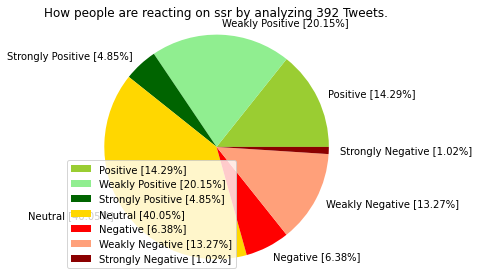

In [64]:
plt.pie(sizes, labels = labels, colors = colors)
plt.legend(labels, loc="best")
plt.title('How people are reacting on ' + searchTerm + ' by analyzing ' + str(NoOfTerms) + ' Tweets.')
plt.axis('equal')
plt.tight_layout()
plt.show()